In [1]:
from sklearn.decomposition import PCA  # 导入 sklearn.decomposition.PCA 类
import numpy as np  

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
modelPCA = PCA(n_components=2)  # 建立模型，设定保留主成分数 K=2
modelPCA.fit(X)  # 用数据集 X 训练 模型 modelPCA
print(modelPCA.n_components_)  # 返回 PCA 模型保留的主成份个数
# 2
print(modelPCA.explained_variance_ratio_)  # 返回 PCA 模型各主成份占比
# [0.9924 0.0075]  # print 显示结果
print(modelPCA.singular_values_) # 返回 PCA 模型各主成份的奇异值
# [6.3006 0.5498]  # print 显示分类结果

X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
modelPCA2 = PCA(n_components=0.9) # 建立模型，设定主成份方差占比 0.9
# 用数据集 X 训练 模型 modelPCA2，并返回降维后的数据
Xtrans = modelPCA2.fit_transform(X)
print(modelPCA2.n_components_)  # 返回 PCA 模型保留的主成份个数
# 1
print(modelPCA2.explained_variance_ratio_)  # 返回 PCA 模型各主成份占比
# [0.9924]  # print(Youcans) 显示结果 
print(modelPCA2.singular_values_)  # 返回 PCA 模型各主成份占比
# [6.3006]  # print 显示结果 
print(Xtrans)  # 返回降维后的数据 Xtrans
# [[1.3834], [2.2219], [3.6053], [-1.3834], [-2.2219], [-3.6053]]


2
[0.99244289 0.00755711]
[6.30061232 0.54980396]
1
[0.99244289]
[6.30061232]
[[ 1.38340578]
 [ 2.22189802]
 [ 3.6053038 ]
 [-1.38340578]
 [-2.22189802]
 [-3.6053038 ]]


In [2]:
# Demo of sklearn.decomposition.IncrementalPCA

from sklearn.datasets import load_digits
from sklearn.decomposition import IncrementalPCA, PCA
from scipy import sparse  # Youcans， XUPT

X, _ = load_digits(return_X_y=True)
print(type(X))  # <class 'numpy.ndarray'>
print(X.shape)      # (1797, 64)

modelPCA = PCA(n_components=6)  # 建立模型，设定保留主成分数 K=6
modelPCA.fit(X)  # 用数据集 X 训练 模型 modelPCA
print(modelPCA.n_components_)  # 返回 PCA 模型保留的主成份个数
# 6
print(modelPCA.explained_variance_ratio_)  # 返回 PCA 模型各主成份占比
# [0.1489 0.1362 0.1179 0.0841 0.0578 0.0492]
print(sum(modelPCA.explained_variance_ratio_))  # 返回 PCA 模型各主成份占比
# 0.5941
print(modelPCA.singular_values_) # 返回 PCA 模型各主成份的奇异值
# [567.0066  542.2518 504.6306 426.1177 353.3350 325.8204]

# let the fit function itself divide the data into batches
Xsparse = sparse.csr_matrix(X)  # 压缩稀疏矩阵，并非 IPCA 的必要步骤
print(type(Xsparse))  # <class 'scipy.sparse.csr.csr_matrix'>
print(Xsparse.shape)  # (1797, 64)
modelIPCA = IncrementalPCA(n_components=6, batch_size=200)
modelIPCA.fit(Xsparse)  # 训练模型 modelIPCA
print(modelIPCA.n_components_)  # 返回 PCA 模型保留的主成份个数
# 6
print(modelIPCA.explained_variance_ratio_)  # 返回 PCA 模型各主成份占比
# [0.1486 0.1357 0.1176 0.0838 0.0571 0.0409]
print(sum(modelIPCA.explained_variance_ratio_))  # 返回 PCA 模型各主成份占比
# 0.5838
print(modelIPCA.singular_values_) # 返回 PCA 模型各主成份的奇异值
#[566.4544 541.334 504.0643 425.3197 351.1096 297.0412]



<class 'numpy.ndarray'>
(1797, 64)
6
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691 ]
0.5941326298498044
[567.0065665  542.25185421 504.63059421 426.11767608 353.33503275
 325.82036557]
<class 'scipy.sparse.csr.csr_matrix'>
(1797, 64)
6
[0.14861608 0.13572726 0.11768139 0.08378509 0.05709806 0.04086667]
0.5837745596311367
[566.45444068 541.33439567 504.06434822 425.31966808 351.10965884
 297.04120633]


<class 'numpy.ndarray'>


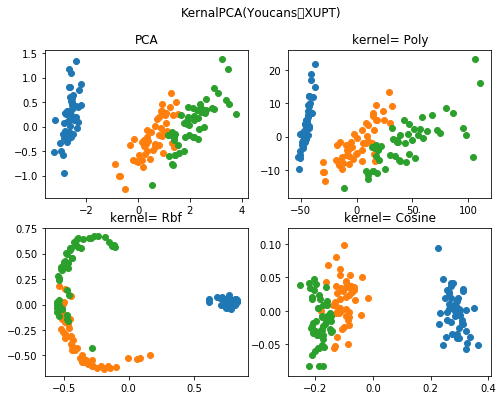

In [4]:
# Demo of sklearn.decomposition.KernelPCA

from sklearn.datasets import load_iris
from sklearn.decomposition import KernelPCA, PCA
import matplotlib.pyplot as plt
import numpy as np  # Youcans， XUPT

X, y = load_iris(return_X_y=True)
print(type(X))  # <class 'numpy.ndarray'>

modelPCA = PCA(n_components=2)  # 建立模型，设定保留主成分数 K=2
Xpca = modelPCA.fit_transform(X)  # 用数据集 X 训练 模型 modelKPCA

modelKpcaP = KernelPCA(n_components=2, kernel='poly') # 建立模型，核函数：多项式
XkpcaP = modelKpcaP.fit_transform(X)  # 用数据集 X 训练 模型 modelKPCA

modelKpcaR = KernelPCA(n_components=2, kernel='rbf') # 建立模型，核函数：径向基函数
XkpcaR = modelKpcaR.fit_transform(X)  # 用数据集 X 训练 模型 modelKPCA

modelKpcaS = KernelPCA(n_components=2, kernel='cosine') # 建立模型，核函数：余弦函数
XkpcaS = modelKpcaS.fit_transform(X)  # 用数据集 X 训练 模型 modelKPCA

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
for label in np.unique(y):
    position = y == label
    ax1.scatter(Xpca[position, 0], Xpca[position, 1], label='target=%d' % label)
    ax1.set_title('PCA')
    ax2.scatter(XkpcaP[position, 0], XkpcaP[position, 1], label='target=%d' % label)
    ax2.set_title('kernel= Poly')
    ax3.scatter(XkpcaR[position, 0], XkpcaR[position, 1], label='target=%d' % label)
    ax3.set_title('kernel= Rbf')
    ax4.scatter(XkpcaS[position, 0], XkpcaS[position, 1], label='target=%d' % label)
    ax4.set_title('kernel= Cosine')
plt.suptitle("KernalPCA(Youcans，XUPT)")
plt.show()
